<a href="https://colab.research.google.com/github/Upasna22/AdapterViews/blob/master/Prospectus_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv('training.csv', engine='python', encoding='utf-8', header=0, error_bad_lines=False, sep=',')

In [129]:
train_df.drop(train_df.columns[train_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
train_df.head()

,Datapoint_Name,Section_header,Section_content,Fund Context Ref,Series ID,Section ID
0,EntityRegistrantName,FRANKLIN TEMPLETON INTERNATIONAL TRUST,---,{'contextRef': 'Trust'},NaN,NaN
1,Risk Return Heading,Fund Summary,NaN,{'contextRef': 'Trust'},S000019801,S000019801
2,Shareholder Fees,Shareholder Fees (fees paid directly from your...,MaximumSalesChargeImposedOnPurchasesOverOfferi...,{'contextRef': 'S000019801_FranklinIndiaGrowth...,S000019801,S000019801_2.1
3,Annual fund operating expense,Annual Fund Operating Expenses(expenses that y...,ManagementFeesOverAssets : 0.0130\nDistributio...,{'contextRef': 'S000019801_FranklinIndiaGrowth...,S000019801,S000019801_2.2
4,Expense Example By Year,NaN,ExpenseExampleByYearColumnName : \nExpenseExam...,NaN,S000019801,S000019801_2.4


In [130]:
print(train_df.shape)

(164571, 6)


In [131]:
for col in train_df.columns: 
    print(col) 

Datapoint_Name
Section_header
Section_content
Fund Context Ref
Series ID
Section ID


Value Counts - Number of training samples for each class :


In [132]:

train_df['Datapoint_Name'].value_counts()

Shareholder Fees                        12428
Average Annual Return                   12428
Annual fund operating expense           12428
Expense Example By Year                 12428
Risk Return Heading                     12262
Investment Objective                    11298
Performance                             11205
Fees and expenses                       11186
Example (expense projection)            11180
Principal investment strategies         11163
Principal risks                         11134
Portfolio turnover                      10486
Performance information                  9898
Performance Bar Chart                    9823
EntityRegistrantName                     2717
Expenses Restated to Reflect Current     1729
Expenses Deffered Charges                 778
Name: Datapoint_Name, dtype: int64

Number of unique funds :


In [148]:
train_df['Series ID'].nunique()

9405

Frequency distribution of Datapoint Name/ Class 

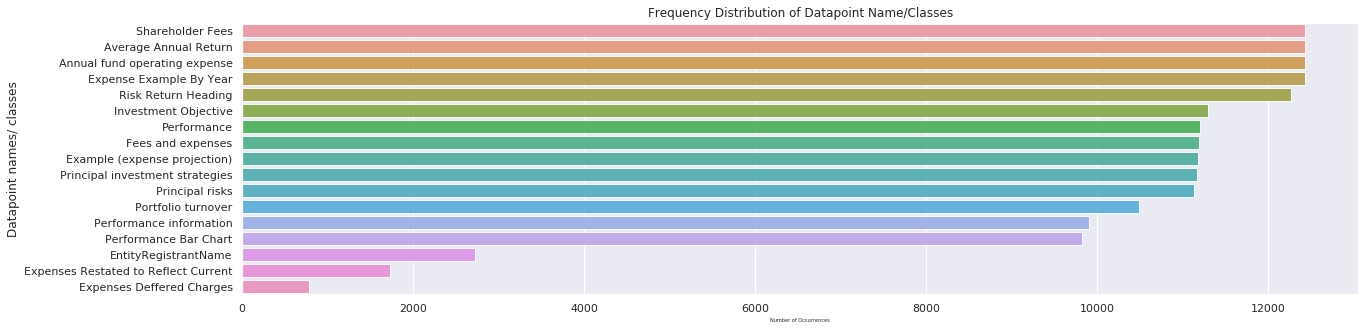

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
carrier_count = train_df['Datapoint_Name'].value_counts()
sns.set(style="darkgrid")
a4_dims = (21.7, 28.27)
sns.barplot(carrier_count.values, carrier_count.index, alpha=0.9)
plt.title('Frequency Distribution of Datapoint Name/Classes')
plt.ylabel('Datapoint names/ classes', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=5)
plt.show()

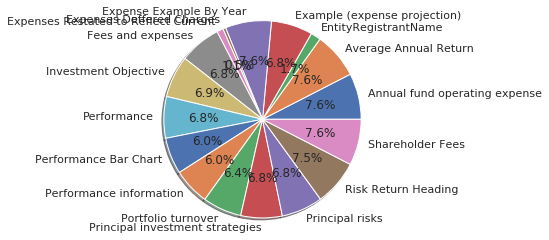

In [145]:
labels = train_df['Datapoint_Name'].astype('category').cat.categories.tolist()
counts = train_df['Datapoint_Name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

Null Values


In [141]:
print("Total number of missing values : ")
print(train_df.isnull().values.sum())
print("Total number of missing Datapoint names : " )
print(train_df['Datapoint_Name'].isnull().values.sum())
print("Column-wise distribution of null values")
print(train_df.isnull().sum())

Total number of missing values : 
74382
Total number of missing Datapoint names : 
0
Column-wise distribution of null values
Datapoint_Name          0
Section_header      28259
Section_content     12430
Fund Context Ref    28259
Series ID            2717
Section ID           2717
dtype: int64
